# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

While no explicit count of how many campaigns are referenced in the UCI documentation or the paper itself. Based on data exploration, 42 campaigns could be inferred from the dataset.  The code is outlined in the next cell for completeness, but executed lower after the data has been imported.


In [2]:
# # Checking the unique number of campaigns by using the 'campaign' column which indicates the number of contacts performed during this campaign 
# campaigns = df['campaign'].nunique()
# campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, \
    classification_report, accuracy_score, roc_curve, auc, precision_recall_curve, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline

# Load the dataset
file_path = 'data/bank-additional-full.csv'
df = pd.read_csv(file_path, sep=';')

# Display the first few rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Display basic information
df.info()

# Display summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Checking the unique number of campaigns by using the 'campaign' column which indicates the number of contacts performed during this campaign 
campaigns = df['campaign'].nunique()
campaigns


42

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


No missing values.


In [7]:
days_counts = df['day_of_week'].value_counts()
print(days_counts)

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64


It appears there is a reasonable distribution of day of the week.



In [8]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Features:\n", categorical_features)


Categorical Features:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [9]:
pdays_counts = df['pdays'].value_counts()
print(pdays_counts)

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64


Appears there is a large amount of 999 (unknown) data.  This can be condensed to a smaller number of entries by grouping basic timeframes.  Will modify to be recent, not recent, and not contacted.


In [36]:
unique_months = df['month'].nunique()
print("Unique count for month:", unique_months)

Unique count for month: 10


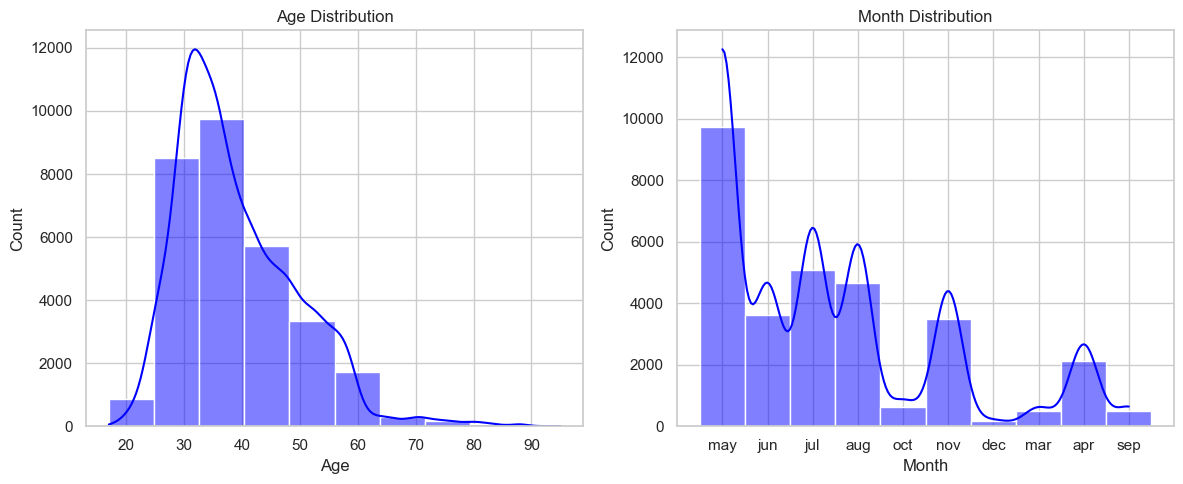

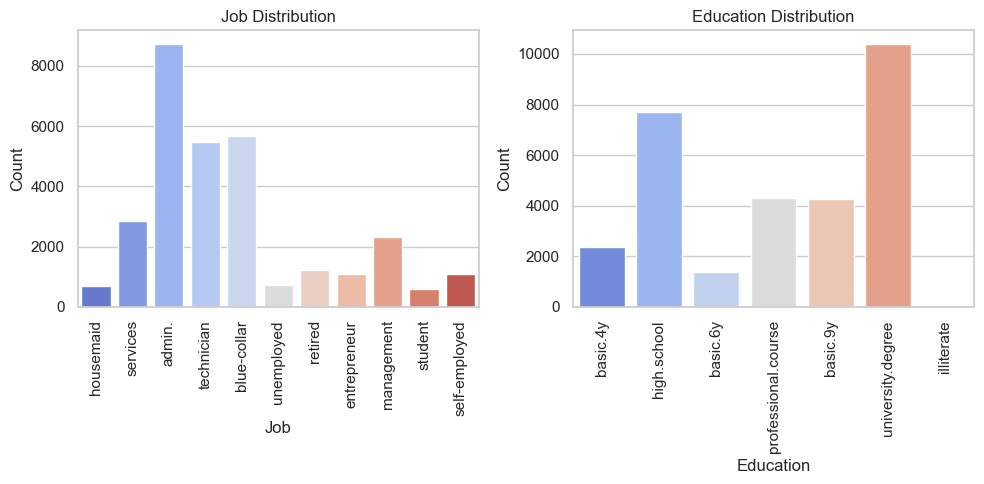

In [45]:
# Plot: Show distributions of age, month, job, and education
plt.figure(figsize=(12, 5))

# Age distribution
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=10, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Month distribution
plt.subplot(1, 2, 2)
sns.histplot(df['month'], bins=10, kde=True, color='blue')
plt.title('Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()

# Plot: Bar plot for categorical variables like job and outcome
plt.figure(figsize=(10, 5))


# Education distribution
plt.subplot(1, 2, 2)
sns.countplot(x='education', data=df, palette='coolwarm')
plt.title('Education Distribution')
plt.xticks(rotation=90)
plt.xlabel('Education')
plt.ylabel('Count')

# Job distribution
plt.subplot(1, 2, 1)
sns.countplot(x='job', data=df, palette='coolwarm')
plt.title('Job Distribution')
plt.xticks(rotation=90)
plt.xlabel('Job')
plt.ylabel('Count')


# Display the plots
plt.tight_layout()
plt.show()

In [10]:
duration_counts = df['duration'].value_counts()
print(duration_counts)

duration
90      170
85      170
136     168
73      167
124     164
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: count, Length: 1544, dtype: int64


There doesn't appear to be any specific high point in the distribution.  In addition this data would only be available in the future which does not help us predict candidates.  Ultimately, this feature will be dropped.

In [11]:
# Drop duration as this information will be unavailable when making predictions
df = df.drop('duration', axis=1)

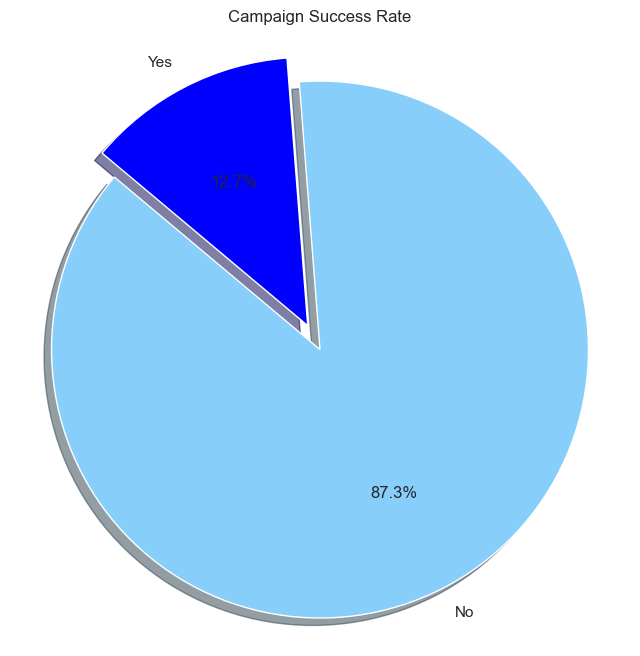

In [61]:
# Pie chart for campaign success
labels = ['No', 'Yes']
sizes = y_counts.values
colors = ['lightskyblue', 'blue']
explode = (0.1, 0)  # explode the 'Yes' slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Campaign Success Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Note: this graph shows the imbalance that was discussed in the paper.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Business Objective:**
The classification goal is to predict if a client will subscribe (yes/no) to a term deposit based on various features. Given the imbalanced nature of the dataset, special attention will be paid to correctly predicting the minority class ("yes").


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [13]:
#Encode pdays into categorical buckets to remove the the numeric spread from the data

# Create a new column 'pdays_category' to categorize pdays
df['pdays_category'] = df['pdays'].apply(
    lambda x: 'Not Contacted' if x == 999 
    else 'Recently Contacted' if x < 30 
    else 'Contacted Long Ago'
)

# Display the first few rows to see the new categorization
df[['pdays', 'pdays_category']].head()


,pdays,pdays_category
0,999,Not Contacted
1,999,Not Contacted
2,999,Not Contacted
3,999,Not Contacted
4,999,Not Contacted


In [14]:
df.drop('pdays', axis=1, inplace=True)

In [15]:
# Handling categorical variables with unknowns

# Replace 'unknown' with NaN and decide on imputation or removal
df.replace('unknown', pd.NA, inplace=True)

# For simplicity, we'll drop rows with missing values
df.dropna(inplace=True)

# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('y')  # Exclude target variable
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Encode categorical variables using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Encode target variable
le = LabelEncoder()
df_encoded['y'] = le.fit_transform(df_encoded['y'])  # 0: no, 1: yes

# Display the first few rows of the encoded dataframe
df_encoded.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,pdays_category_Recently Contacted
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,...,False,False,False,True,False,False,False,True,False,False
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,...,False,False,False,True,False,False,False,True,False,False
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,...,False,False,False,True,False,False,False,True,False,False
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,...,False,False,False,True,False,False,False,True,False,False
6,59,1,0,1.1,93.994,-36.4,4.857,5191.0,0,False,...,False,False,False,True,False,False,False,True,False,False


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [16]:
# Define features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the distribution in training and testing sets
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("\nTesting set class distribution:\n", y_test.value_counts(normalize=True))

Training set class distribution:
 y
0    0.873432
1    0.126568
Name: proportion, dtype: float64

Testing set class distribution:
 y
0    0.873401
1    0.126599
Name: proportion, dtype: float64


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [17]:
# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_linear_reg = linear_reg.predict(X_test)

# Convert predictions to binary outcomes
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_linear_reg]

# Print classification report
print("Classification Report - Linear Regression:")
print(classification_report(y_test, y_pred_binary))


Classification Report - Linear Regression:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5326
           1       0.63      0.23      0.34       772

    accuracy                           0.89      6098
   macro avg       0.76      0.61      0.64      6098
weighted avg       0.86      0.89      0.86      6098



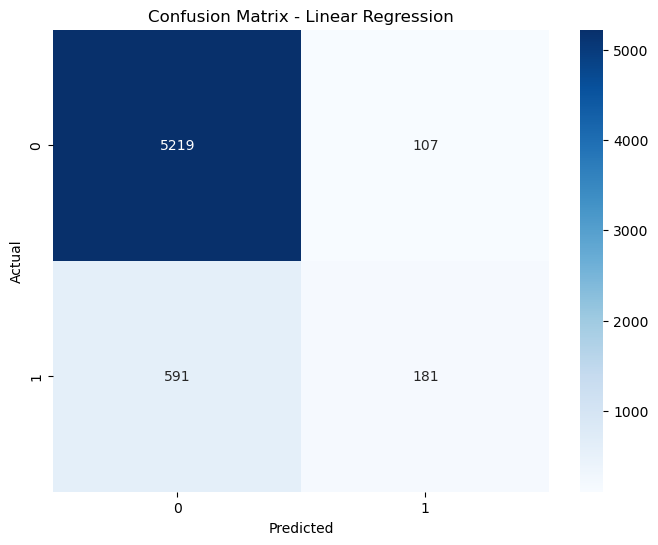

In [18]:
# Generate the confusion matrix
conf_matrix_linear_reg = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_linear_reg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Linear Regression')
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [19]:
# Initialize Logistic Regression with class_weight='balanced'
logreg = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_logreg))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      5326
           1       0.36      0.65      0.46       772

    accuracy                           0.81      6098
   macro avg       0.65      0.74      0.67      6098
weighted avg       0.87      0.81      0.83      6098

ROC-AUC Score: 0.7891508612554698


### Problem 9: Score the Model

What is the accuracy of your model?

Accuracy: 0.8096
Precision: 0.3598
Recall: 0.6464
F1-Score: 0.4623
ROC-AUC: 0.7892


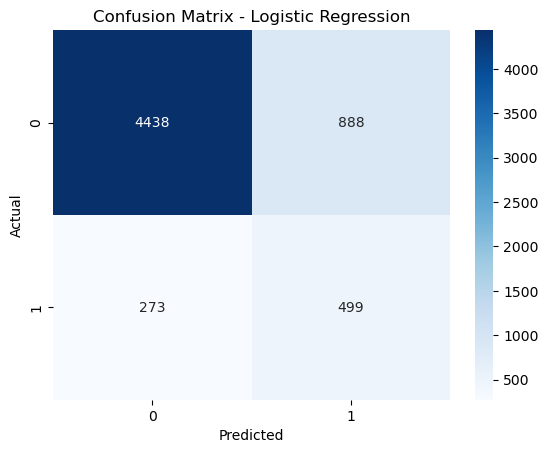

In [20]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)
roc_auc = roc_auc_score(y_test, y_prob_logreg)
conf_matrix = confusion_matrix(y_test, y_pred_logreg)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [21]:
# Initialize models with class_weight='balanced' where applicable
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'SVM': SVC(class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=7)
}

# Dictionary to store evaluation results
results = {}

for name, model in models.items():
    print(f"Performing training for {name}...")
    # Start timer
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # End timer and calculate training time
    training_time = time.time() - start_time

    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred),
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time': training_time
    }

# Create a DataFrame for comparison
results_df = pd.DataFrame(results).T


Performing training for Logistic Regression...
Performing training for Decision Tree...
Performing training for SVM...
Performing training for KNN...


In [22]:
# Print the summary table
print("\nSummary of Model Performance:")

# Create a DataFrame for comparison
summary_df = pd.DataFrame(results).T
summary_df = summary_df[['Precision', 'Recall', 'F1-Score', 'Accuracy', 'Time']]

summary_df




Summary of Model Performance:


,Precision,Recall,F1-Score,Accuracy,Time
Logistic Regression,0.359769,0.646373,"(0.46225104214914314,)",0.80961,20.75781
Decision Tree,0.304348,0.326425,"(0.315,)",0.820269,0.125608
SVM,0.246207,0.735751,"(0.36895095810328027,)",0.681371,15.387188
KNN,0.491031,0.283679,"(0.35960591133004927,)",0.872089,0.00521


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Choosing a scoring option:
- Choose recall if the goal is to maximize the number of true potential subscribers and you're willing to accept some false positives (wasting marketing resources).
- Choose F1 score if you need a balance between capturing potential subscribers and minimizing marketing waste from false positives.

In this case I will chose F1, but this could be revisited to use recall if the cost of the campaign allowed for this.

In [23]:
# Initialize hyperparameter grids for tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        #'C': [0.1, 1, 10, 100],
        'C': [10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
}


# Initialize models with class_weight='balanced' where applicable
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'SVM': SVC(class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier()
}

# Dictionary to store evaluation results
results = {}

# Dictionary to store probabilities and predictions for later graphing
model_predictions = {}

for name, model in models.items():
    # Perform GridSearchCV for hyperparameter tuning
    print(f"Performing hyperparameter tuning for {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    
    # Start timer
    start_time = time.time()
    
    # Train the model with the best found parameters
    grid_search.fit(X_train, y_train)
    
    # End timer and calculate training time
    training_time = time.time() - start_time
    
    # Get the best model from grid search
    best_model = grid_search.best_estimator_
    
    # Predict
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else best_model.decision_function(X_test)
    
    # Store predictions and probabilities for graphing
    model_predictions[name] = {
        'y_pred': y_pred,
        'y_prob': y_prob,
        'best_model': best_model
    }
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the results
    results[name] = {
        'Best Parameters': grid_search.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time': training_time
    }

# Create a DataFrame for comparison
results_df = pd.DataFrame(results).T

# Display the results
print("\nSummary of Model Performance:")
print(results_df)


Performing hyperparameter tuning for Logistic Regression...
Performing hyperparameter tuning for Decision Tree...
Performing hyperparameter tuning for SVM...
Performing hyperparameter tuning for KNN...

Summary of Model Performance:
                                                       Best Parameters  \
Logistic Regression                       {'C': 10, 'solver': 'lbfgs'}   
Decision Tree        {'max_depth': 5, 'min_samples_leaf': 4, 'min_s...   
SVM                    {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}   
KNN                  {'algorithm': 'auto', 'n_neighbors': 3, 'weigh...   

                    Precision    Recall  F1-Score  Accuracy        Time  
Logistic Regression   0.36081  0.646373  0.463109  0.810266   52.997669  
Decision Tree        0.358285  0.638601  0.459032  0.809446    1.938343  
SVM                  0.381503  0.598446  0.465961  0.826337  232.245482  
KNN                  0.459963  0.319948  0.377387   0.86635   17.484311  


In [62]:
# Print the summary table
print("\nSummary of (F1) Tuned Model Performance:")

# Create a DataFrame for comparison
summary_df = pd.DataFrame(results).T
summary_df = summary_df[['Best Parameters', 'Precision', 'Recall', 'F1-Score', 'Accuracy', 'Time']]

summary_df




Summary of (F1) Tuned Model Performance:


,Best Parameters,Precision,Recall,F1-Score,Accuracy,Time
Logistic Regression,"{'C': 10, 'solver': 'lbfgs'}",0.36081,0.646373,0.463109,0.810266,52.997669
Decision Tree,"{'max_depth': 5, 'min_samples_leaf': 4, 'min_s...",0.358285,0.638601,0.459032,0.809446,1.938343
SVM,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.381503,0.598446,0.465961,0.826337,232.245482
KNN,"{'algorithm': 'auto', 'n_neighbors': 3, 'weigh...",0.459963,0.319948,0.377387,0.86635,17.484311


##### Questions

### Additional Visualizations

To gain deeper insights into model performance, consider adding the following visualizations:

- **ROC Curves:** To visualize the trade-off between true positive rate and false positive rate.
- **Precision-Recall Curves:** Particularly useful for imbalanced datasets.
- **Feature Importance:** For models like Decision Trees to understand which features contribute most to the predictions.


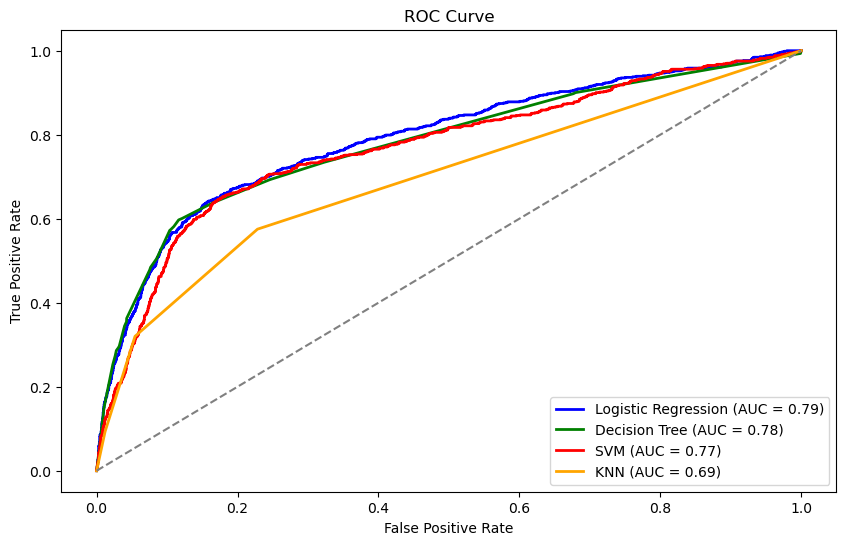

In [25]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'orange']

for idx, (name, predictions) in enumerate(model_predictions.items()):
    y_prob = predictions['y_prob']
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[idx], lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Final ROC curve adjustments
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Show ROC curve
plt.show()


#### What is an ROC Curve?

The **ROC curve** shows how well a model distinguishes between positive and negative cases by plotting the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** for different threshold values.

- A higher curve means the model is better at making predictions.
- The **diagonal line** represents random guessing, so any curve above that line indicates the model performs better than random.

#### Area Under the Curve (AUC):

- **AUC** measures overall model performance. A perfect model has an AUC of 1, while a random model has an AUC of 0.5.
  
#### Results in This Graph:

- **Logistic Regression (AUC = 0.79)**: The best-performing model.
- **Decision Tree (AUC = 0.78)**: Very close to Logistic Regression.
- **SVM (AUC = 0.77)**: Also performs well but slightly behind.
- **KNN (AUC = 0.69)**: The lowest AUC, but still better than random.

In short, all models perform better than random guessing, with **Logistic Regression** performing the best overall.


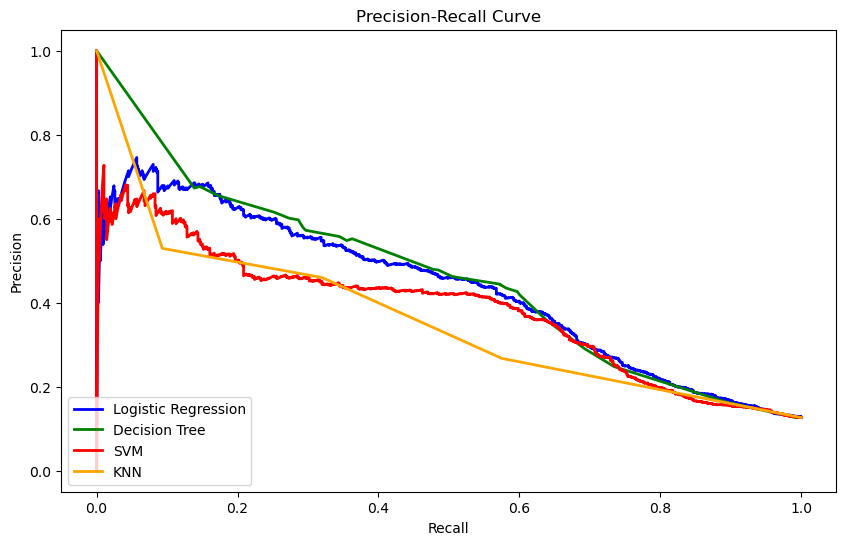

In [26]:
# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'orange']

for idx, (name, predictions) in enumerate(model_predictions.items()):
    y_prob = predictions['y_prob']
    
    # Precision-Recall Curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall_curve, precision_curve, color=colors[idx], lw=2, label=f'{name}')

# Final Precision-Recall curve adjustments
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

# Show Precision-Recall curve
plt.show()


Key observations:
- Decision Tree shows the best overall performance, with its curve generally higher than others.
- All models show a typical sharp precision drop at very low recall, reflecting the dataset's imbalance.

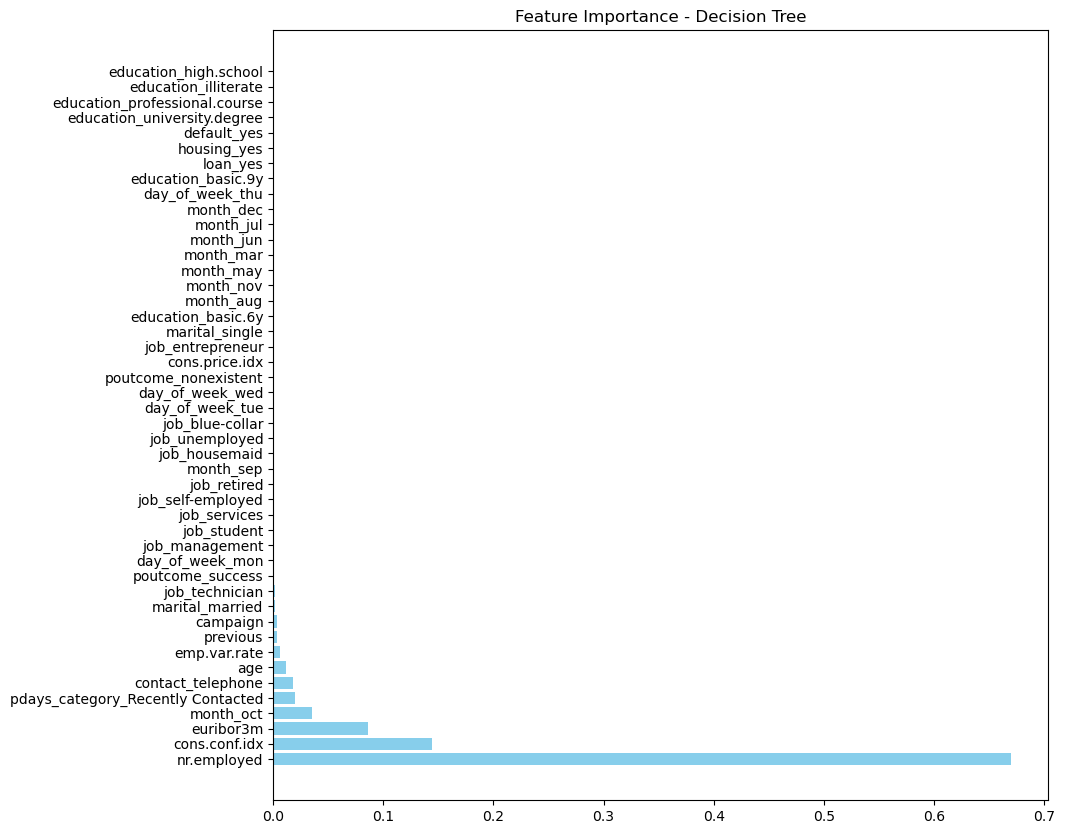

In [27]:
# Plot Feature Importance for Decision Tree
if 'Decision Tree' in model_predictions:
    best_tree_model = model_predictions['Decision Tree']['best_model']
    
    if hasattr(best_tree_model, 'feature_importances_'):
        importance = best_tree_model.feature_importances_
        sorted_idx = importance.argsort()[::-1]
        plt.figure(figsize=(10, 10))
        plt.title('Feature Importance - Decision Tree')
        plt.barh(X_train.columns[sorted_idx], importance[sorted_idx], color='skyblue')
        plt.show()


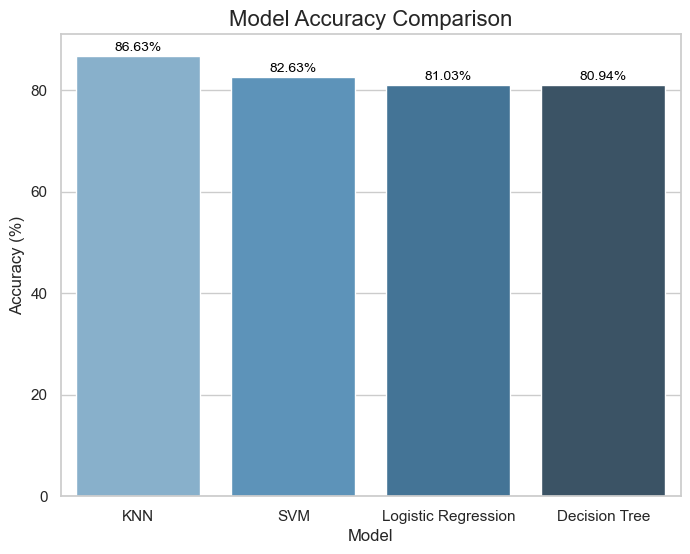

In [52]:
# Model performance data
models = ['KNN', 'SVM', 'Logistic Regression', 'Decision Tree']

# Extract F1 scores and accuracy from the results dictionary
f1_scores = [results[model]['F1-Score'] for model in models]
accuracy = [results[model]['Accuracy'] * 100 for model in models]  # Convert to percentage

# Set the plotting style
sns.set_theme(style="whitegrid")

# Bar Plot for Accuracy
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracy, palette="Blues_d")
# Add the accuracy scores as text annotations to each bar
for i in range(len(models)):
    plt.text(i, accuracy[i] + 1, f'{accuracy[i]:.2f}%', ha='center', color='black', fontsize=10)
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.show()


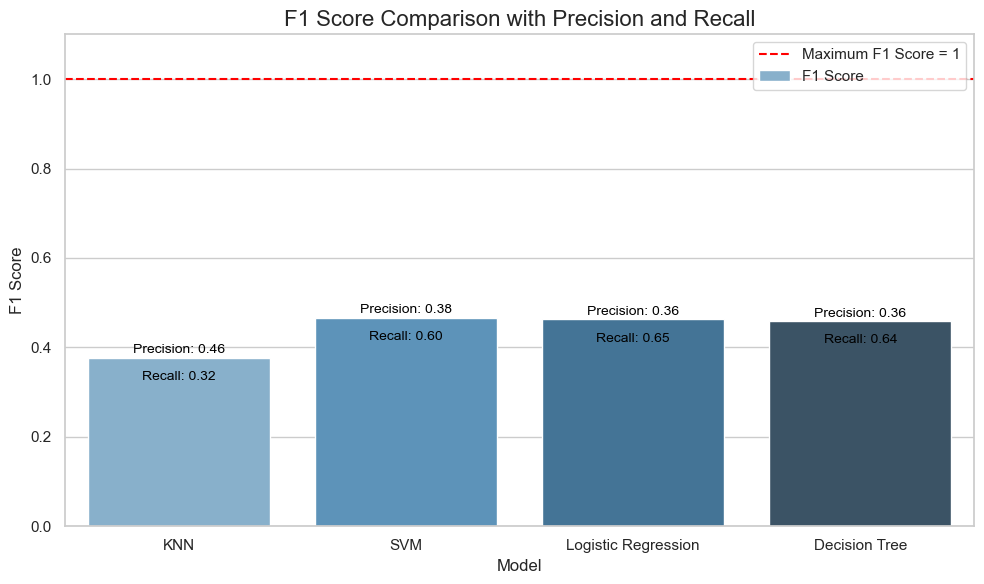

In [29]:
# Graph f1 data with explination

# Set the plotting size
plt.figure(figsize=(10, 6))

# Plot F1 Scores
sns.barplot(x=models, y=f1_scores, palette="Blues_d", label="F1 Score")

# Add the Precision and Recall as text annotations to each bar
for i in range(len(models)):
    plt.text(i, f1_scores[i] + 0.01, f'Precision: {results[models[i]]["Precision"]:.2f}', ha='center', color='black', fontsize=10)
    plt.text(i, f1_scores[i] - 0.05, f'Recall: {results[models[i]]["Recall"]:.2f}', ha='center', color='black', fontsize=10)

# Add titles and labels
plt.title("F1 Score Comparison with Precision and Recall", fontsize=16)
plt.ylabel("F1 Score", fontsize=12)
plt.xlabel("Model", fontsize=12)

# Indicating maximum F1 score (1.0) with a dashed line
plt.axhline(1.0, linestyle='--', color='red', label='Maximum F1 Score = 1')

# Show plot
plt.ylim(0, 1.1)  # Set the y-limit to show the max F1 score line
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
